## Predict car price based on features

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("CarDekho/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## Feature Values

In [5]:
print(df["Seller_Type"].unique())
print(df["Fuel_Type"].unique())
print(df["Owner"].unique())
print(df["Transmission"].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
[0 1 3]
['Manual' 'Automatic']


## Checking missing values

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**No missing values**

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Creating **Car Age** to find how old is the car?

In [8]:
from datetime import date
df['Car_Age'] = date.today().year - df["Year"]
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


**Car Name and Year** is not required to predict prices so dropping it from main dataframe

In [9]:
final_df = df.copy()
final_df.drop(['Car_Name','Year'],axis=1,inplace=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


## One hot encoding of final dataframe

In [10]:
final_df = pd.get_dummies(final_df,drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [11]:
# Correlations
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


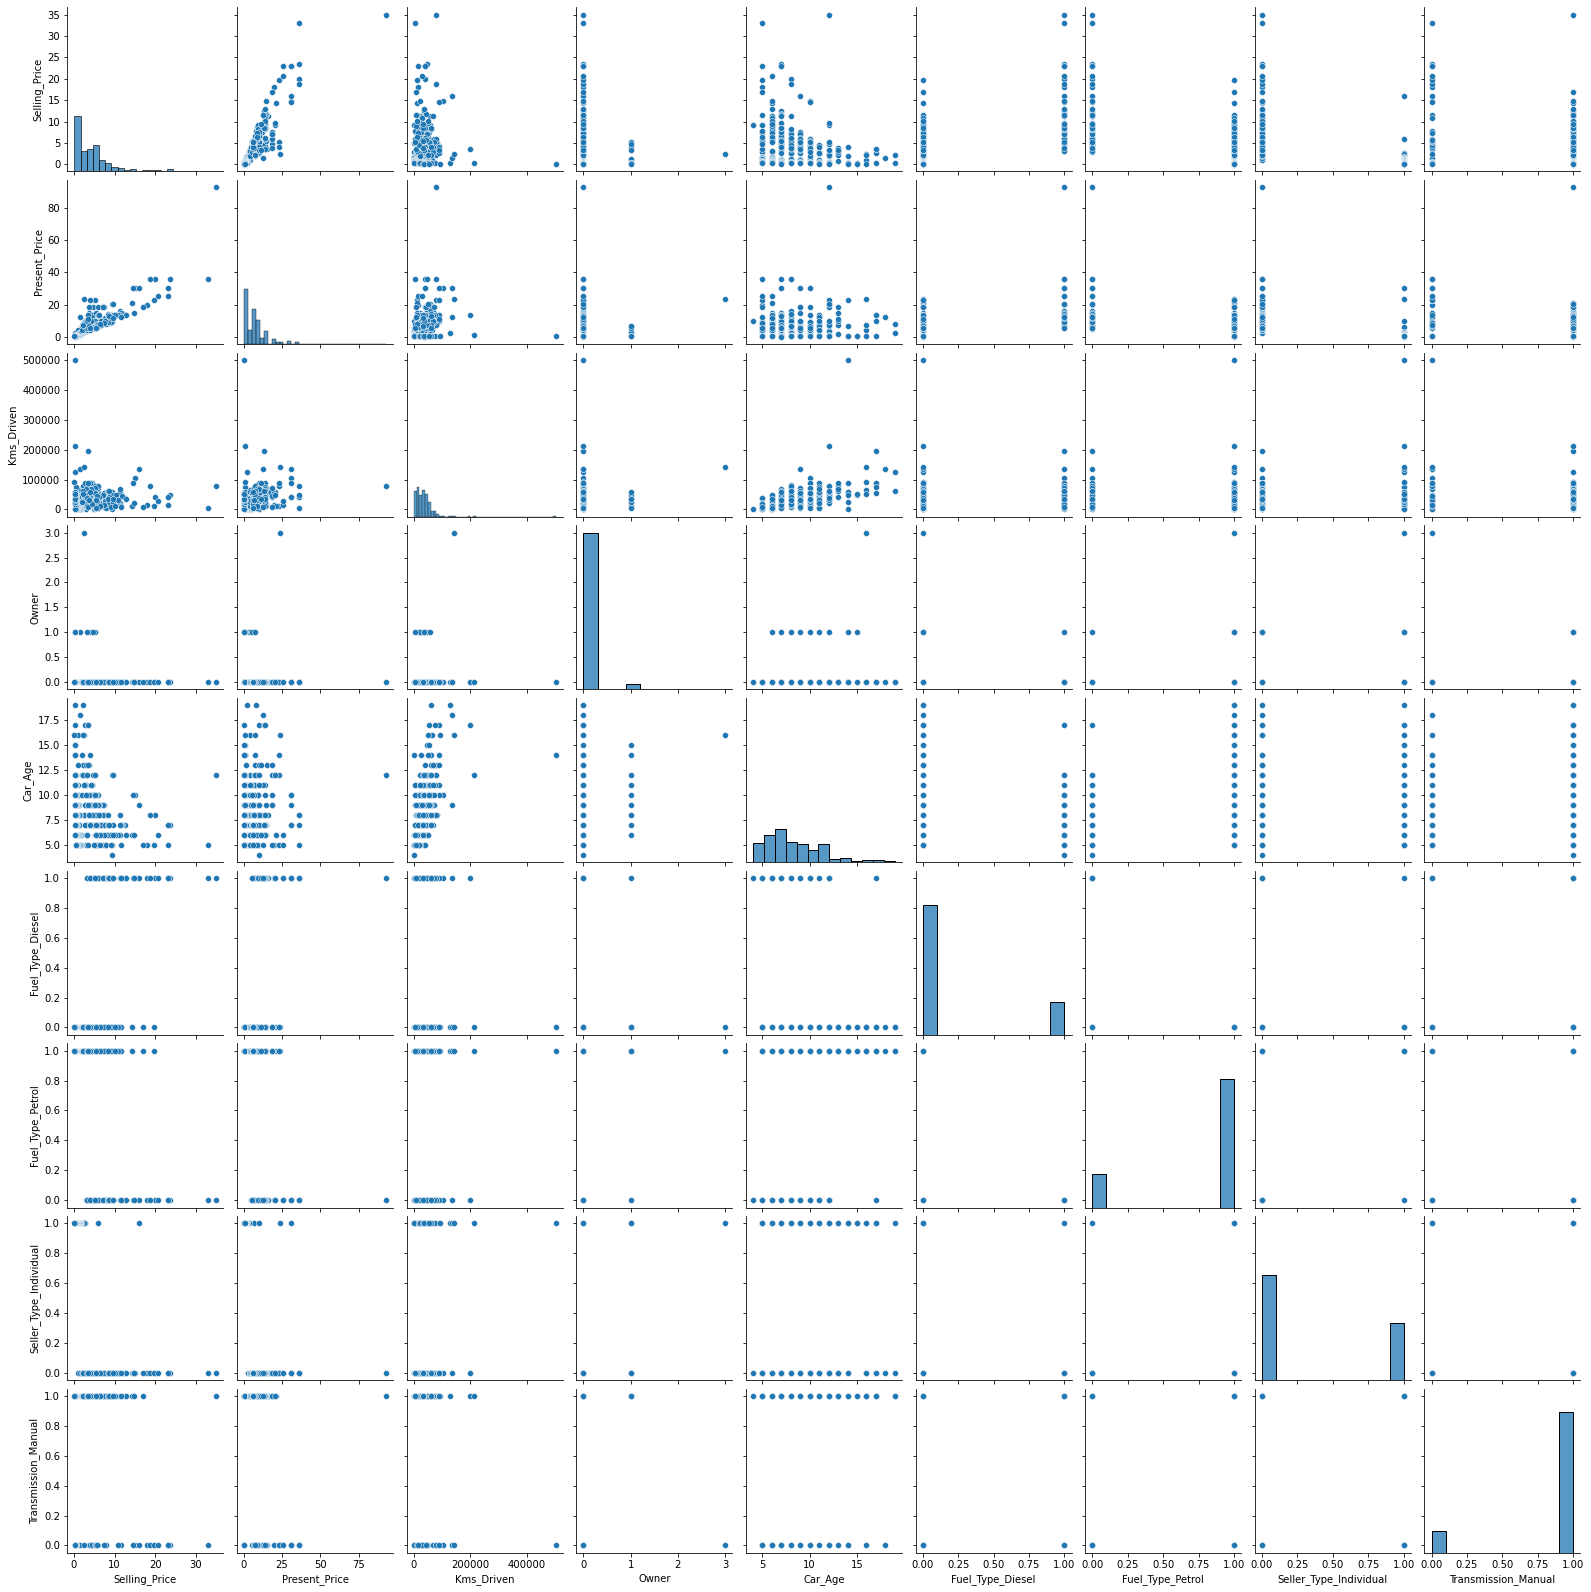

In [12]:
sns.pairplot(final_df)

<AxesSubplot:>

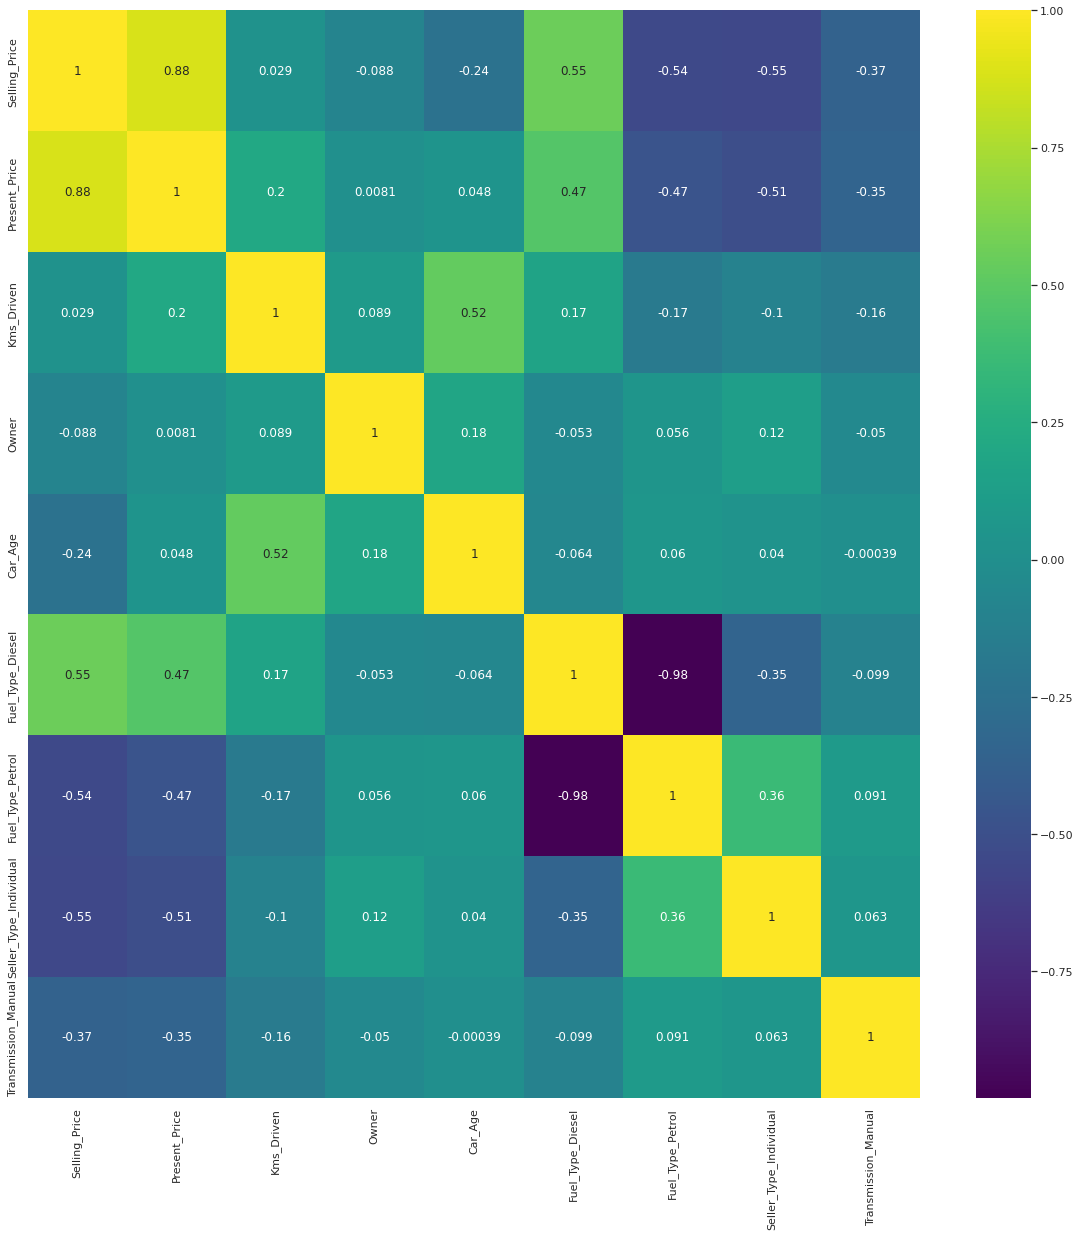

In [13]:
sns.set(rc = {"figure.figsize":(20,20)})
sns.heatmap(final_df.corr(),annot=True,cmap='viridis')

In [14]:
# Separating dependent and independent features
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [15]:
X

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,6,1,0,0,1
297,5.90,60000,0,7,0,1,0,1
298,11.00,87934,0,13,0,1,0,1
299,12.50,9000,0,5,1,0,0,1


In [16]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Feature Importance

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
feature_imp = pd.Series(model.feature_importances_,index=model.feature_names_in_)
# Important features from top to bottom with their importance value
feature_imp.sort_values(ascending=False)

Present_Price             0.376369
Fuel_Type_Diesel          0.239338
Transmission_Manual       0.139991
Seller_Type_Individual    0.114872
Car_Age                   0.071217
Kms_Driven                0.044453
Fuel_Type_Petrol          0.013315
Owner                     0.000446
dtype: float64

**Present Price** is the most important feature and so on..

## Splitting training and testing part

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
X_train.shape,X_test.shape

((240, 8), (61, 8))

In [21]:
y_train.shape,y_test.shape

((240,), (61,))

## Using Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [23]:
# Hyperparameters

# No of trees in random forest
n_estimators = list(np.linspace(start= 100, stop=1200,num=12,dtype="int64"))

# Maximum number of features to consider at each split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = list(np.linspace(5,30,num=60,dtype='int64'))

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [24]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [25]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [26]:
rf_random = RandomizedSearchCV(estimator = rf,
                              param_distributions = random_grid,
                              scoring = 'neg_mean_squared_error',
                              n_iter = 10,
                              cv = 5,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = 1)

In [27]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 5, 5, 6, 6, 7, 7, 7, 8,
                                                      8, 9, 9, 10, 10, 10, 11,
                                                      11, 12, 12, 13, 13, 13,
                                                      14, 14, 15, 15, 16, 16,
                                                      16, 17, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                         

In [28]:
predictions = rf_random.predict(X_test)

In [29]:
predictions

array([ 0.41524129,  5.14424697,  7.25593331,  4.4411349 ,  0.53160928,
        1.21967427,  1.49071297,  0.50388396,  7.62956763,  1.14662672,
        0.46166211,  3.60438896,  5.08388516,  1.19160217,  7.07900405,
        1.23804422,  0.737005  ,  4.97578415,  3.75515775,  7.64725217,
        5.25865222,  0.70943141,  0.82226784,  1.16115039,  1.15678148,
        3.23620394,  5.25652924,  4.34035494,  9.91216541,  0.66897783,
        9.68558313,  5.50714667,  2.81442561, 21.28273449,  1.21285702,
        3.51241111, 15.63952091,  5.93151043,  5.06998904,  2.88179827,
        4.05494846,  0.21708355,  0.44873237,  7.51906005,  0.56662647,
        4.64798447,  8.56215782,  0.52373409,  5.82521789,  5.0631814 ,
        4.1429902 ,  2.7678261 , 10.0064599 ,  0.45970576,  5.95085973,
       10.0340974 ,  0.24495202,  0.24242243,  0.35333327,  0.46105735,
        7.75191099])

<AxesSubplot:xlabel='Selling_Price'>

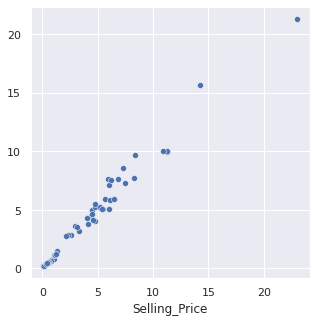

In [35]:
sns.set(rc = {"figure.figsize":(5,5)})
sns.scatterplot(x=y_test,y=predictions)

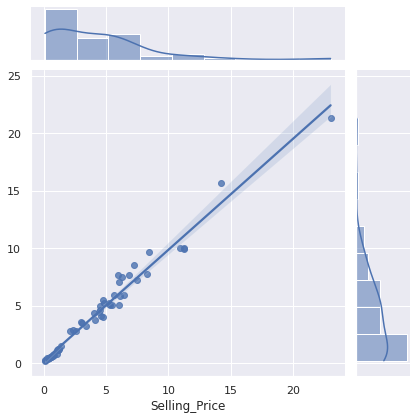

In [31]:
sns.jointplot(x=y_test,y=predictions,kind='reg')

In scatter plot the relation ship is **approximate linear**

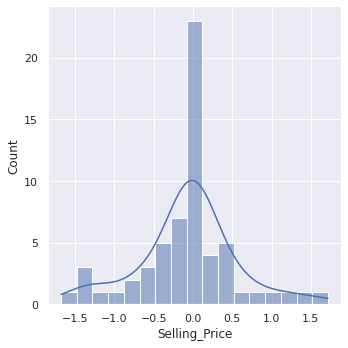

In [32]:
sns.displot(y_test-predictions,kde=True)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9762798934576634

In distribution plot the range of lesser difference .i.e values of difference b/w actual and predicted values is **more near 0 or equal to 0**

## Conclusion:
**Model is highly accurate**

In [38]:
import pickle
file = open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)